<center><font size = "10"> Week 13 - Simplification <center>
<center><font size = "8">Home Work <center>

# Ex1. Integrate-And-Fire (IF) Neuron Model

<font size='3'>What is an Integrate-And-Fire (IF) neuron model ? What are the pros and cons of this model - in what situation would this model be useful ? Which aspects of neuronal dynamics does it neglect ? 
    
<font size='3'>Find in the literature a couple of examples that use this type of model and explain why it is (or is not) a good choice for the research question being addressed. [2 pts]

#### What is an Integrate-And-Fire (IF) neuron model ?

The integrate and fire neuron model is one of the commonly used models in neuroscience. This model was first introduced by Louis Lapicque, and has been then used to describe and understand the behaviour of distinct neuronal systems. More specifically, this model describes the changes in membrane potential, that arise as a result of incoming synaptic inputs/injected currents.
Mechanistically, the IF model consists of a resistor-capacitor (RC) electrical circuit. In this parallel circuit, the resistor represents the ‘leakage’ of the neuronal membrane, while the capacitor is used to model its capacitance. In this model, the capacitor is progressively charged, until it reaches a certain threshold. At this moment, the capacitor discharges, producing a spike. Consequently, the membrane potential is reset to its initial value.


#### What are the pros and cons of this model - in what situation would this model be useful ? Which aspects of neuronal dynamics does it neglect ? 

The integrate-and-fire neuron model are relatively simple spiking model, that can reproduce many characteristics of real neurons. As ideally, one will always seek the simplest model that can explain most of the features of a neuron, we can understand why these models have been deemed both practical and useful in computational neuroscience. Moreover, the IF model can be used to define single units in a multi-unit network or even to model multiple networks interactions.

The IF model describes the rate at which the cell, depolarizes toward its threshold, and the rate at which the cell hyperpolarizes back to rest. When the depolarization reaches its threshold value, this indicated an action potential has occurred. However, the action potentials produced in this model, lack the typical pronounced overshoot and the reversal of membrane polarization.

Thus, this model only describes slow sub-threshold dynamics. On contrast, more complex models can be used to understand supra-threshold behaviours, such as fast depolarization and the consequent voltage reset of the after-hyperpolarization. 


#### Find in the literature a couple of examples that use this type of model and explain why it is (or is not) a good choice for the research question being addressed. 

In 2003, Rauch et al., showed that an integrate-and-fire model can be used to predict the mean rate of pyramidal cells, from in-vitro experiments. In these experiments, the authors used an IF model with a spike-frequency adaptation/facilitation. The experimenters showed that robustness of the IF models, which can easily be adapted (by adding extra parameters) to re-create in vitro experimental data.

In another study, Teeter et al. (2018), used a generalised leaky IF model to reproduce the behaviour of over 600 neuronal cells from different transgenic lines. The leaky integrate-fire model, comprises of an additional 'leak' term in the membrane potential equation. This term describes the ion diffusion through the membrane at rest potential. This type of IF model, represents a more biological-realistic description of the cell behaviour compared to the non-leaky IF model. In addition to this, the generalised LIF model incorporeates additional phenomenological mechanisms, that are directly derived from electrophysiological data. These parameters mainly described the inactivation & activation mechanisms of voltage-gated ion channels. This study is a good example, of how one can adapt the simple IF model, to reproduce complex neuronal behviour across many cell types. The added phenomenological mechanisms add more realistic biological behaviours to our modelled neurons. In turns this leads to an easier categorisation, and the data becomes more easily interpretable and could possible be mapped to previously described biological mechanisms.

# Ex2. Point Neuron: excitatory and inhibitory stimulation

<font size='3'>Create one artifical simplified IF point neuron that responds to excitatory and inhibitory simulations, similar to one in the tutorials. 
Run the following tests and explain the role of each parameter and the effect of its modification, plot Vm, I, E, +input, -input and output for each test and describe your obervations [2 pts] :
1. <font size='3'>Vary the membrane time constant to see change in spiking 
2. <font size='3'>Increase and decrease the rise and decay time constants for the inhibitory synapse
3. <font size='3'>Modify the decay time constant for the excitatory synapse

In [1]:
from neuron import h
import matplotlib.pyplot as plt
import math as m

# Load external files & initialize
h.load_file("stdrun.hoc");
soma = h.Section() # dummy section so h._ref_t works

In [2]:
def experiment(taum, taui1, taui2, taue):
    # IntFire4 artificial cell
    if4 = h.IntFire4()
    if4.taum = taum # membrane time constant
    if4.taui1 = taui1 # inhibitory current time constant 1
    if4.taui2 = taui2 # inhibitory current time constant 2
    if4.taue = taue # excitatory current time constant
    
    # Stimulators
    s4a = h.NetStim()
    s4a.interval = 5 # inter-spike interval
    s4a.number = 100 # number of spikes
    s4a.start = 5 # periodic

    s4b = h.NetStim()
    s4b.interval = 25 # inter-spike interval
    s4b.number = 10 # number of spikes
    s4b.start = 8 # periodic
    
    # connect stimulators to IF4 cell
    nc4a = h.NetCon(s4a, if4)
    nc4a.weight[0] = 0.5 # weight of each event
    # store input spike times
    nc4a_v = h.Vector()
    nc4a.record(nc4a_v)

    nc4b = h.NetCon(s4b, if4)
    nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)
    # store input spike times
    nc4b_v = h.Vector()
    nc4b.record(nc4b_v)
    
    # store output spike (event) times
    ev4 = h.NetCon(if4, None)
    ev4_v = h.Vector()
    ev4.record(ev4_v)
    
    # record time
    time_v = h.Vector()
    time_v.record(h._ref_t)
    
    # initialize
    h.stdinit()
    h.finitialize(-65)

    # record M, E and I functions
    vm4_v = h.Vector()
    im4_v = h.Vector()
    em4_v = h.Vector()
    vm4_v.append(if4.M())
    im4_v.append(if4.I())
    em4_v.append(if4.E())

    tstop = 200 # final time
    nstep = m.ceil(tstop / h.dt) # number of time steps
    for i in range(0,nstep):
        h.fadvance() # advance time step
        vm4_v.append(if4.M()) # record M function
        im4_v.append(if4.I()) # record I function
        em4_v.append(if4.E()) # record E function
        
    # plot membrane voltage and current
    fig, ax = plt.subplots(figsize=(10,4))
    title = 'taum: ' + str(taum) + ' , taui1: ' + str(taui1) + ', taui2: ' + str(taui2) + ', taue: ' + str(taue)
    ax.set_title(title)
    ax.plot(time_v,vm4_v,label='Vm')
    ax.plot(time_v,im4_v,label='I')
    ax.plot(time_v,em4_v,label='E')
    ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
    ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
    if len(ev4_v) > 0:
        ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
    fig.legend()
    
    return time_v, vm4_v, im4_v, em4_v

### 1. Vary the membrane time constant to see change in spiking

For all the experiments we use the IntFire4 artificial cell of Neuron. In this model, when the membrane potential reaches 1, the cell fires and the membrane potential is re-initialized to 0. The current due to the input events is integrated with a membrane time constant of taum. If we increase the taum (e.g. from 6 to 12) and keep the rest of parameters constant, we can see an increase in the firing rate of the neuron. 

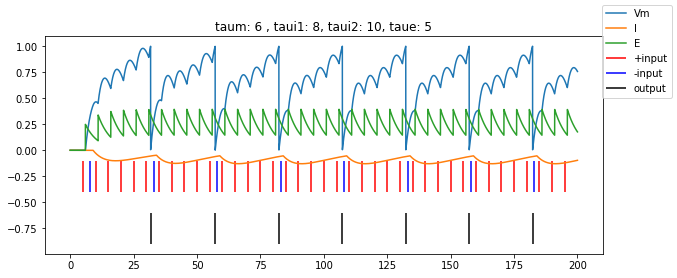

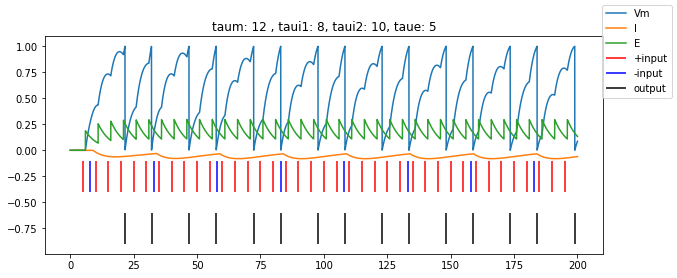

In [3]:
time_v, vm4_v, im4_v, em4_v = experiment(taum=6, taui1=8, taui2=10, taue=5)
time_v, vm4_v, im4_v, em4_v = experiment(taum=12, taui1=8, taui2=10, taue=5)

### 2. Increase and decrease the rise and decay time constants for the inhibitory synapse

In the IntFire4 model, the current due to a inhibitory input (negative weight) event is the difference between two exponentials with time constants taui1 (inhibitory input rise time constant) and taui2 (inhibitory input decay time constant). Both time constants have to be considered. If we increase and decrease the rise and decay time constants by the same value (e.g. taui1=2, taui2=15 vs. taui1=8, taui2=9), we observe a rather similar behavior for the change in the membrane voltage. In the case of both values being larger (e.g. taui1=8, taui2=15 vs. taui1=2, taui2=9), the inhibitory current change will be slower and it will remain at more negative values leading to a bigger negative input and therefore decreasing the firing rate, and viceversa. 

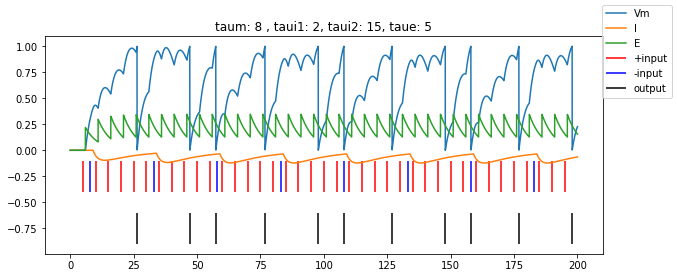

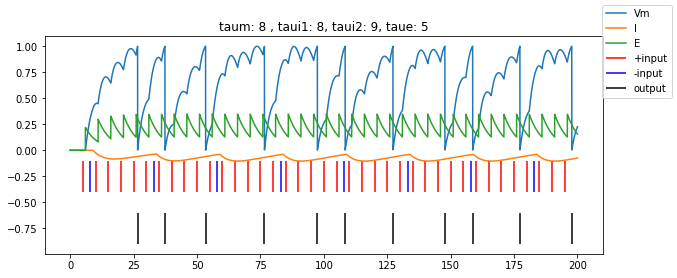

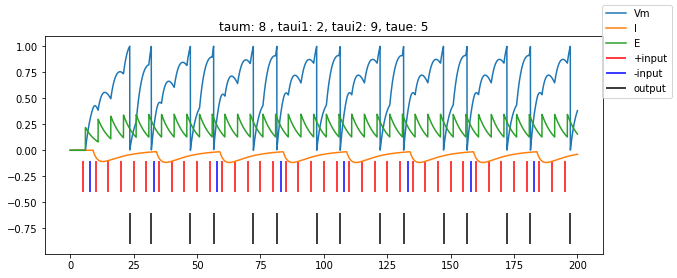

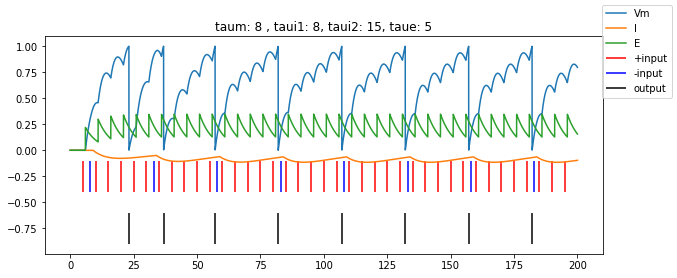

In [45]:
time_v, vm4_v, im4_v_1, em4_v = experiment(taum=8, taui1=2, taui2=15, taue=5)
time_v, vm4_v, im4_v_2, em4_v = experiment(taum=8, taui1=8, taui2=9, taue=5)
time_v, vm4_v, im4_v_3, em4_v = experiment(taum=8, taui1=2, taui2=9, taue=5)
time_v, vm4_v, im4_v_4, em4_v = experiment(taum=8, taui1=8, taui2=15, taue=5)

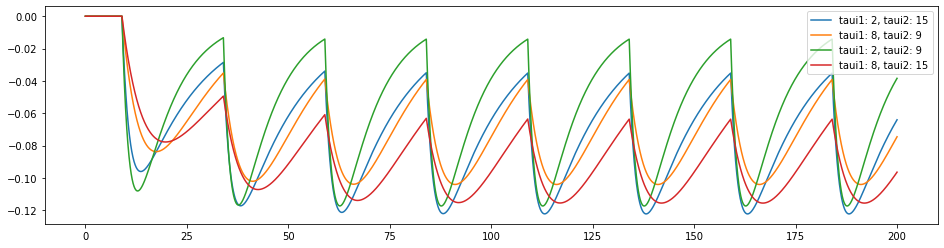

In [46]:
plt.subplots(figsize = (16, 4))
plt.plot(time_v, im4_v_1, label = 'taui1: 2, taui2: 15')
plt.plot(time_v, im4_v_2, label = 'taui1: 8, taui2: 9')
plt.plot(time_v, im4_v_3, label = 'taui1: 2, taui2: 9')
plt.plot(time_v, im4_v_4, label = 'taui1: 8, taui2: 15')
plt.legend()

### 3. Modify the decay time constant for the excitatory synapse

In the IntFire4 model, excitatory input events (positive weight) are treated as a sudden change in current which decays exponentially with time constant taue. We can see that if we increase this time constant, the decay of the excitatory input is slower, thus the values of excitation current are higher and there is an increase in the spiking rate of the neuron.

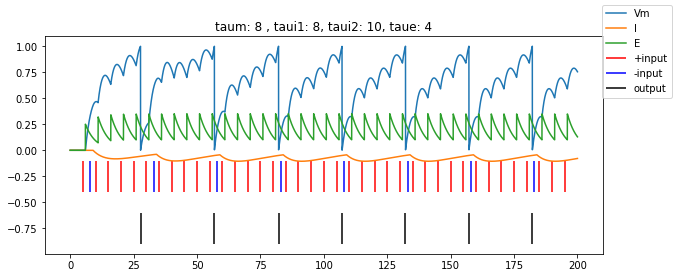

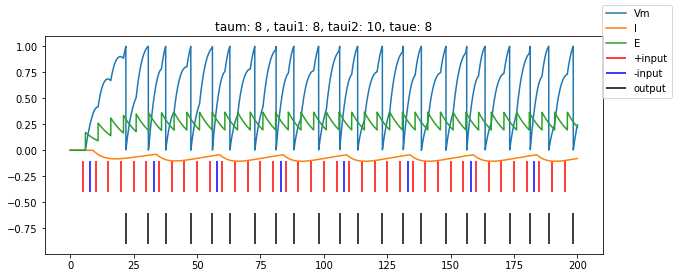

In [73]:
time_v, vm4_v, im4_v, em4_v_1 = experiment(taum=8, taui1=8, taui2=10, taue=4)
time_v, vm4_v, im4_v, em4_v_2 = experiment(taum=8, taui1=8, taui2=10, taue=8)

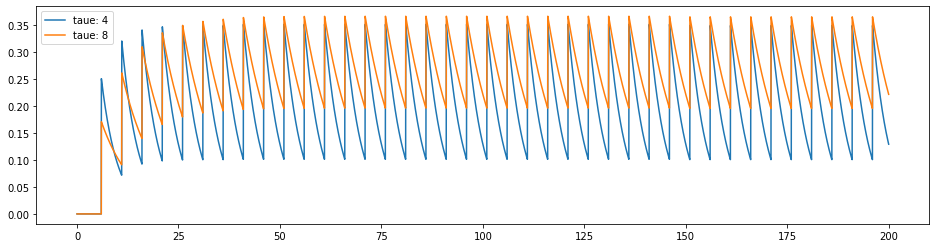

In [76]:
plt.subplots(figsize = (16, 4))
plt.plot(time_v, em4_v_1, label = 'taue: 4')
plt.plot(time_v, em4_v_2, label = 'taue: 8')
plt.legend()

# Ex3. Point Neuron Network Experimentation

<font size='3'>Create a point neuron network with 30 IF neurons with 55% probability that a cell could be excitatory. Assign to your excitatory and inhibitory cell populations different model parameters (taum, taui1, taui2 and taue) of your choice. Make sure to try a few different values that would make the neurons fire nicely. Define random connectivity, stimulation and simulation as it is in tutorial 02. 

<font size='3'>Experiment with the time constants of the inhibitory and excitatory cells to make each population dominate the network in turn. Plot the voltage traces and the raster as your solution and comment on your experimentaiton and observations.  [2 pts]

### Excitatory domination

In [44]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np

# Load external files & initialize
h.load_file("stdrun.hoc");
soma = h.Section() # dummy section so h._ref_t works

In [45]:
Nneur = 30 # number of neurons in network
pExc = 0.55 # probability of cell being excitatory

In [46]:
rng = np.random.default_rng()

# create cell population with fixed parameters
cells = []
for i in range(0,Nneur):
    if4 = h.IntFire4()
    if4.taum = 8 # membrane time constant
    if4.taui1 = 8 # inhibitory current time constant 1
    if4.taui2 = 10 # inhibitory current time constant 2
    if4.taue = 3 # excitatory current time constant
    typ = 'Exc' if rng.uniform() < pExc else 'Inh' # sample type
    cells.append({ 'GID': i, 'cell': if4, 'type': typ, 'conns': [], 'spikes': h.Vector(), 'V': None, 'I': None, 'E': None })

NExc = len([x for x in cells if x['type'] == 'Exc'])
NInh = Nneur - NExc
print("Have {} Exc cells and {} Inh cells in network".format(NExc,NInh))

Have 15 Exc cells and 15 Inh cells in network


In [47]:
import itertools

# connect cells with random weights (all-to-all but self)
for src_cell,tgt_cell in itertools.product(cells,cells):
    src = src_cell['cell']
    tgt = tgt_cell['cell']
    if src == tgt:
        dummy = h.NetCon(src, None) # dummy netcon to record events
        dummy.record(src_cell['spikes']) # record spikes
    else:
        w = 0.8 * rng.uniform() # random uniform in [0:0.8)
        w = w if src_cell['type'] == 'Exc' else -w # weight positive (Exc) or negative (Inh)
        nc = h.NetCon(src, tgt) # new netcon between src and tgt
        nc.weight[0] = w # set weight
        nc.delay = rng.integers(5,15) # set delay
        src_cell['conns'].append(nc) # save netcon in source cell

In [48]:
print("Have {} connections in total: E-E = {}; E-I = {}; I-E = {}; I-I = {}".format(
    Nneur*Nneur-Nneur,NExc*NExc-NExc,NExc*NInh,NExc*NInh,NInh*NInh-NInh))

Have 870 connections in total: E-E = 210; E-I = 225; I-E = 225; I-I = 210


In [49]:
# Setup external stimulation (otherwise no activity at all!)
stim = h.NetStim()
stim.start = 5
stim.number = 1000
stim.interval = 10

stimcell = None
for cell in cells:
    if cell['type'] == 'Exc':
        stimcell = cell['cell']
        break
    
stim_nc = h.NetCon(stim, stimcell) # connect to first Exc cell
stim_nc.weight[0] = 0.8
stimvec = h.Vector()
stim_nc.record(stimvec)

0.0

In [50]:
# Setup reporting
tvec = h.Vector()
tvec.record(h._ref_t)

for cell in cells:
    cell['V'] = h.Vector()

In [51]:
# Run simulation (may take a while!)

# initialize
h.stdinit()
h.finitialize(-65)

# store initial value after init
for cell in cells:
    cell['V'].append(cell['cell'].M())

tstop = 200 # final time
nstep = np.int(np.ceil(tstop / h.dt)) # number of time steps
for i in range(0,nstep):
    #print(i)
    h.fadvance() # advance time step
    for cell in cells:
        cell['V'].append(cell['cell'].M()) # record M function

In [52]:
# Collect all spikes
spikes = []
for cell in cells:
    spk = [(t,cell['GID']) for t in cell['spikes']]
    spikes += spk
spikes = np.array(spikes)

print("Have {} spikes in total".format(len(spikes)))

Have 144 spikes in total


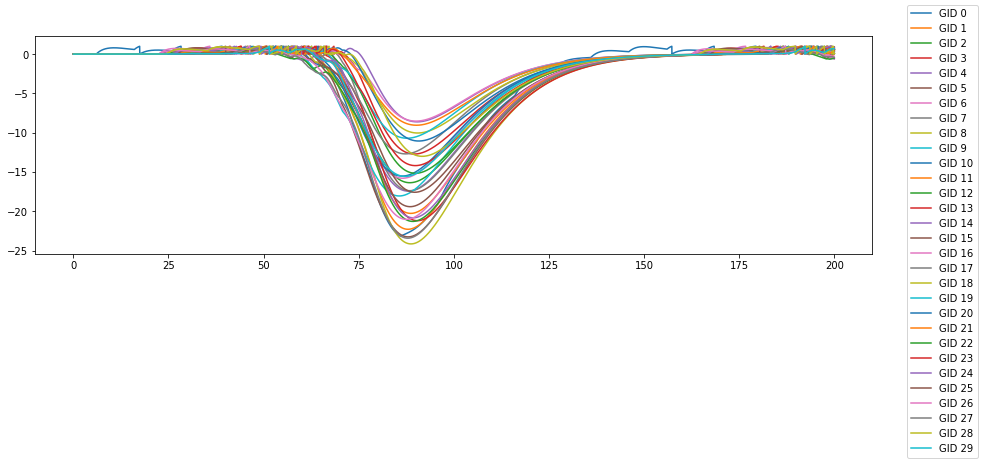

In [53]:
# plot voltage traces
fig, ax = plt.subplots(figsize=(15,4))
for cell in cells:
    ax.plot(tvec,cell['V'],label='GID {}'.format(cell['GID']))
fig.legend()
None

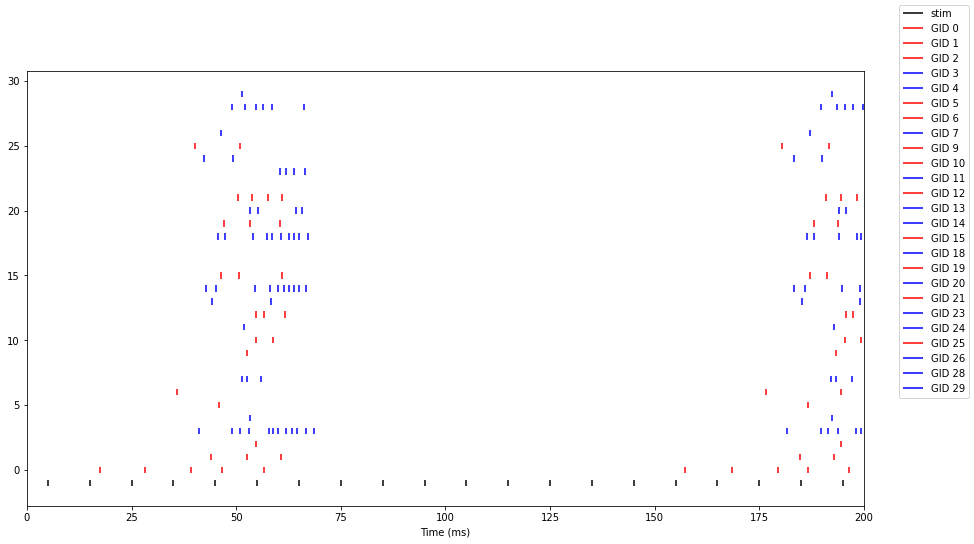

In [54]:
# plot spike raster
fig, ax = plt.subplots(figsize=(15,8))
ax.vlines(stimvec, ymin=-0.75 - 0.5, ymax=-0.25 - 0.5, color='black', label='stim')
for cell in cells:
    c = 'red' if cell['type'] == 'Exc' else 'blue'
    gid = cell['GID']
    ymin = gid + 0.25 - 0.5
    ymax = gid + 0.75 - 0.5
    if len(cell['spikes']) > 0:
        ax.vlines(cell['spikes'], ymin=ymin, ymax=ymax, color=c, label='GID {}'.format(gid))
ax.set_xlim((0,tstop))
ax.set_xlabel('Time (ms)')
fig.legend()
None

### Inhibitory domination

In [12]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np

# Load external files & initialize
h.load_file("stdrun.hoc");
soma = h.Section() # dummy section so h._ref_t works

Nneur = 30 # number of neurons in network
pExc = 0.55 # probability of cell being excitatory

In [13]:
rng = np.random.default_rng()

# create cell population with fixed parameters
cells = []
for i in range(0,Nneur):
    if4 = h.IntFire4()
    if4.taum = 8 # membrane time constant
    if4.taui1 = 3 # inhibitory current time constant 1
    if4.taui2 = 3 # inhibitory current time constant 2
    if4.taue = 10 # excitatory current time constant
    typ = 'Exc' if rng.uniform() < pExc else 'Inh' # sample type
    cells.append({ 'GID': i, 'cell': if4, 'type': typ, 'conns': [], 'spikes': h.Vector(), 'V': None, 'I': None, 'E': None })

NExc = len([x for x in cells if x['type'] == 'Exc'])
NInh = Nneur - NExc
print("Have {} Exc cells and {} Inh cells in network".format(NExc,NInh))

Have 12 Exc cells and 18 Inh cells in network


In [14]:
import itertools

# connect cells with random weights (all-to-all but self)
for src_cell,tgt_cell in itertools.product(cells,cells):
    src = src_cell['cell']
    tgt = tgt_cell['cell']
    if src == tgt:
        dummy = h.NetCon(src, None) # dummy netcon to record events
        dummy.record(src_cell['spikes']) # record spikes
    else:
        w = 0.8 * rng.uniform() # random uniform in [0:0.8)
        w = w if src_cell['type'] == 'Exc' else -w # weight positive (Exc) or negative (Inh)
        nc = h.NetCon(src, tgt) # new netcon between src and tgt
        nc.weight[0] = w # set weight
        nc.delay = rng.integers(5,15) # set delay
        src_cell['conns'].append(nc) # save netcon in source cell

In [15]:
print("Have {} connections in total: E-E = {}; E-I = {}; I-E = {}; I-I = {}".format(
    Nneur*Nneur-Nneur,NExc*NExc-NExc,NExc*NInh,NExc*NInh,NInh*NInh-NInh))

Have 870 connections in total: E-E = 132; E-I = 216; I-E = 216; I-I = 306


In [16]:
# Setup external stimulation (otherwise no activity at all!)
stim = h.NetStim()
stim.start = 5
stim.number = 1000
stim.interval = 10

stimcell = None
for cell in cells:
    if cell['type'] == 'Exc':
        stimcell = cell['cell']
        break
    
stim_nc = h.NetCon(stim, stimcell) # connect to first Exc cell
stim_nc.weight[0] = 0.8
stimvec = h.Vector()
stim_nc.record(stimvec)

0.0

In [17]:
# Setup reporting
tvec = h.Vector()
tvec.record(h._ref_t)

for cell in cells:
    cell['V'] = h.Vector()

In [18]:
# Run simulation (may take a while!)

# initialize
h.stdinit()
h.finitialize(-65)

# store initial value after init
for cell in cells:
    cell['V'].append(cell['cell'].M())

tstop = 200 # final time
nstep = np.int(np.ceil(tstop / h.dt)) # number of time steps
for i in range(0,nstep):
    #print(i)
    h.fadvance() # advance time step
    for cell in cells:
        cell['V'].append(cell['cell'].M()) # record M function

In [19]:
# Collect all spikes
spikes = []
for cell in cells:
    spk = [(t,cell['GID']) for t in cell['spikes']]
    spikes += spk
spikes = np.array(spikes)

print("Have {} spikes in total".format(len(spikes)))

Have 19 spikes in total


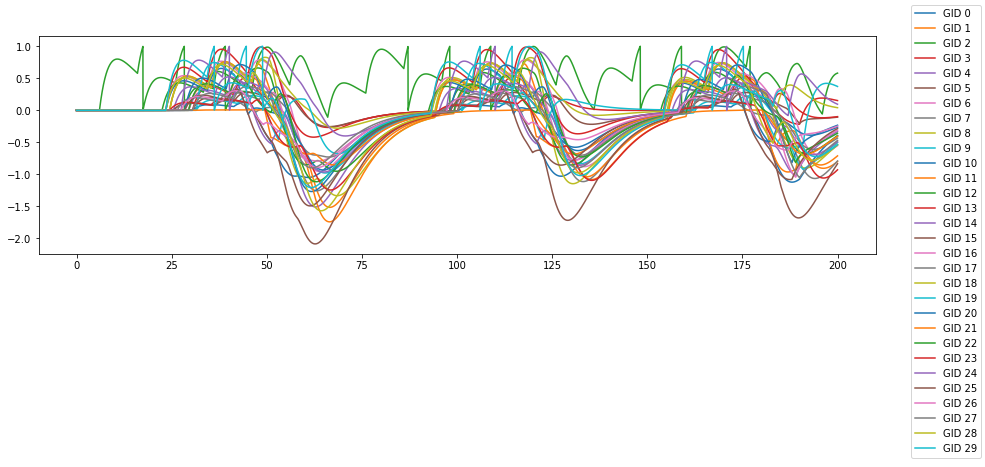

In [20]:
# plot voltage traces
fig, ax = plt.subplots(figsize=(15,4))
for cell in cells:
    ax.plot(tvec,cell['V'],label='GID {}'.format(cell['GID']))
fig.legend()
None

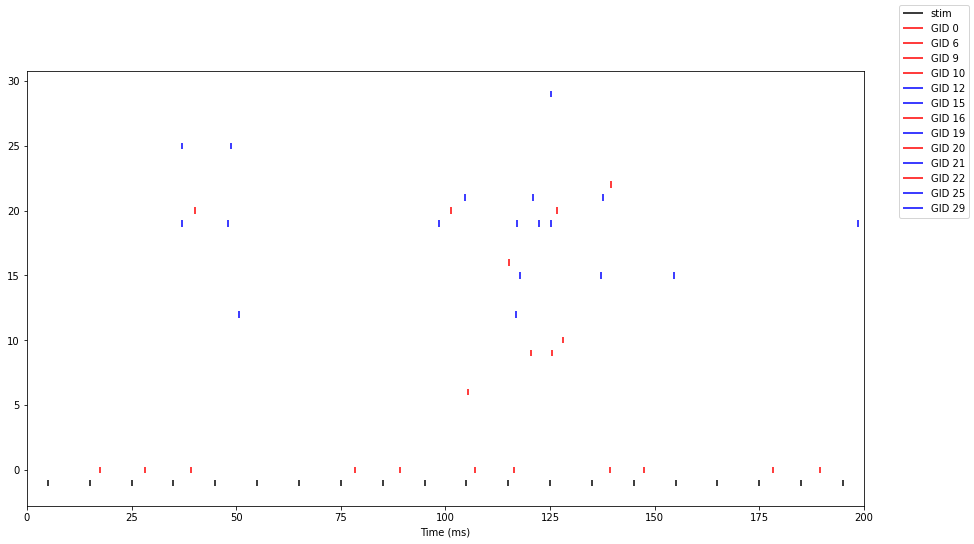

In [11]:
# plot spike raster
fig, ax = plt.subplots(figsize=(15,8))
ax.vlines(stimvec, ymin=-0.75 - 0.5, ymax=-0.25 - 0.5, color='black', label='stim')
for cell in cells:
    c = 'red' if cell['type'] == 'Exc' else 'blue'
    gid = cell['GID']
    ymin = gid + 0.25 - 0.5
    ymax = gid + 0.75 - 0.5
    if len(cell['spikes']) > 0:
        ax.vlines(cell['spikes'], ymin=ymin, ymax=ymax, color=c, label='GID {}'.format(gid))
ax.set_xlim((0,tstop))
ax.set_xlabel('Time (ms)')
fig.legend()
None

To make each population dominate the network, we set the time constant of this population to a low value so that it reacts faster and dominate. We see that when the excitatory population is dominating, we have a nice firing with 144 spikes. When the inhibitory population, we see a lot less firing than before, we now have only 19 peaks. Also if we look at the voltage traces, we see that for the excitatory domination, the voltage is mostly positive and goes to negative values only once (but stays there a while) while for the inhibitory domination the voltage curves go more frequently to negative value which can be one of the reasons its harder for the neurons to fire.